In [138]:
import numpy as np 
import pandas as pd
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [139]:
df=pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [140]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [141]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [142]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].str.replace('+','')
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [143]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [144]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Dependents'].replace({'0':0,'1':1,'2':2,'3':3},inplace=True)
df['Married'].replace({'Yes':1,'No':0},inplace=True)
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
df['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [145]:
df['CoapplicantIncome']=df['CoapplicantIncome'].astype("int64")
df['LoanAmount']=df['LoanAmount'].astype("int64")
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype("int64")
df['Credit_History']=df['Credit_History'].astype("int64")

In [146]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_ID'] = le.fit_transform(df.Loan_ID)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,2,1,1,0,1,1,3000,0,66,360,1,2,1
3,3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,4,1,0,0,1,0,6000,0,141,360,1,2,1


In [147]:
smote = SMOTETomek(0.90)
y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)
x_bal,y_bal = smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    353
0    310
Name: Loan_Status, dtype: int64


In [148]:
scaler = StandardScaler()
x_bal = scaler.fit_transform(x_bal)

In [149]:
x_bal = pd.DataFrame(x_bal)
x_bal.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.707489,0.559349,-1.191515,-0.690639,0.622117,-0.338062,0.086626,-0.556824,-0.299215,0.288269,0.598838,1.327262
1,-1.701611,0.559349,0.839268,0.354780,0.622117,-0.338062,-0.124569,0.010674,-0.196120,0.288269,0.598838,-1.219698
2,-1.695733,0.559349,0.839268,-0.690639,0.622117,2.958040,-0.388647,-0.556824,-0.995101,0.288269,0.598838,1.327262
3,-1.689855,0.559349,0.839268,-0.690639,-1.607415,-0.338062,-0.458211,0.330551,-0.299215,0.288269,0.598838,1.327262
4,-1.683977,0.559349,-1.191515,-0.690639,0.622117,-0.338062,0.111816,-0.556824,-0.028592,0.288269,0.598838,1.327262


In [150]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.33, random_state = 30)

## Model

In [151]:
model = DecisionTreeClassifier(max_depth=5,splitter='best',criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [152]:
y_predict= model.predict(x_test)
y_predict_train = model.predict(x_train)

In [153]:
print('Testing accuracy = ', accuracy_score(y_test,y_predict))
print("Training accuracy= ",accuracy_score(y_train,y_predict_train))

Testing accuracy =  0.7442922374429224
Training accuracy=  0.8513513513513513


In [154]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Loan_Status,,
0,61,45
1,11,102


In [155]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.58      0.69       106
           1       0.69      0.90      0.78       113

    accuracy                           0.74       219
   macro avg       0.77      0.74      0.74       219
weighted avg       0.77      0.74      0.74       219



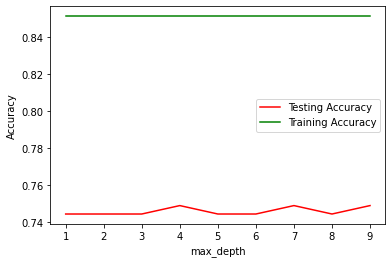

In [157]:
import matplotlib.pyplot as plt

max_depth = np.arange(1,10)
train_accuracy = np.empty(len(max_depth))
test_accuracy = np.empty(len(max_depth))

for i, k in enumerate(max_depth):
    model = DecisionTreeClassifier(max_depth=5,splitter='best',criterion='entropy')
    model.fit(x_train,y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = model.score(x_train, y_train)
    test_accuracy[i] = model.score(x_test, y_test)

plt.plot(max_depth, test_accuracy, label = 'Testing Accuracy', color ='red')
plt.plot(max_depth, train_accuracy, label = 'Training Accuracy', color ='green')
  
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()